# Healthcare Lab (Continuous Distributions Lab)

**Learning Objectives:**
  * Practice Basic Statistical Analysis
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [5]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [6]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [7]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [8]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

0        52.657084
1        52.657084
2        52.657084
3        52.657084
4        52.657084
           ...    
52558    80.637919
52559    70.258727
52560    70.258727
52561    70.258727
52562    70.258727
Name: AgeAtMedicalEvent, Length: 52563, dtype: float64

In [9]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

### 3. Distribution of Age at Medical Event

In [10]:
HealthCareDataSet['AgeAtMedicalEvent']

0        52.657084
1        52.657084
2        52.657084
3        52.657084
4        52.657084
           ...    
52558    80.637919
52559    70.258727
52560    70.258727
52561    70.258727
52562    70.258727
Name: AgeAtMedicalEvent, Length: 52563, dtype: float64

In [11]:
HealthCareDataSet['AgeAtMedicalEvent'].describe()

count    52563.000000
mean        72.110668
std         12.248572
min         20.506502
25%         66.581793
50%         73.119781
75%         80.624230
max         99.709788
Name: AgeAtMedicalEvent, dtype: float64

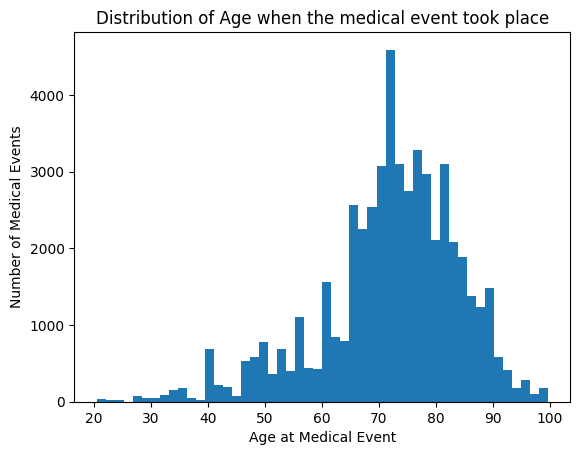

In [12]:
HealthCareDataSet['AgeAtMedicalEvent'].plot(kind='hist', bins=50)
plt.xlabel('Age at Medical Event')
plt.ylabel('Number of Medical Events')
plt.title('Distribution of Age when the medical event took place')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

### From the previous figure we observe that medical event tend to take place when patients's age are between 65 and 80 years.
### this distribution is not normal as it is not symetric. Refer to the following figure.

<Axes: xlabel='AgeAtMedicalEvent'>

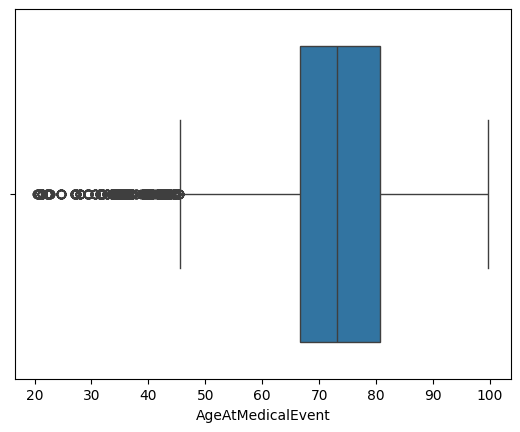

In [13]:
sns.boxplot(x=HealthCareDataSet['AgeAtMedicalEvent'])

### 3. Distribution of Costs per Medical Event

In [14]:
TotalExpensesByMedicalClaim=HealthCareDataSet.groupby('MedicalClaim')['TotalExpenses'].sum()
TotalExpensesByMedicalClaim

MedicalClaim
0012a8eb3c2be5f5      4668.692
002fd7d73d8060f1     53501.259
003886fc8ec986d4     17115.714
004fa1cd47f65193      3672.361
005edafb00d0f6eb      2548.700
                       ...    
ffbb520f6fd3b2c9     16743.412
ffbd17c54f798c21    137173.701
ffe2c14dfe865b6d     82255.586
ffe9f5181940e236     32393.578
fff610c68bdf675f     54658.520
Name: TotalExpenses, Length: 3361, dtype: float64

In [15]:
TotalExpensesByMedicalClaim.describe()

count    3.361000e+03
mean     4.277653e+04
std      6.940660e+04
min      1.561000e+02
25%      6.211940e+03
50%      2.031355e+04
75%      5.149829e+04
max      1.066310e+06
Name: TotalExpenses, dtype: float64

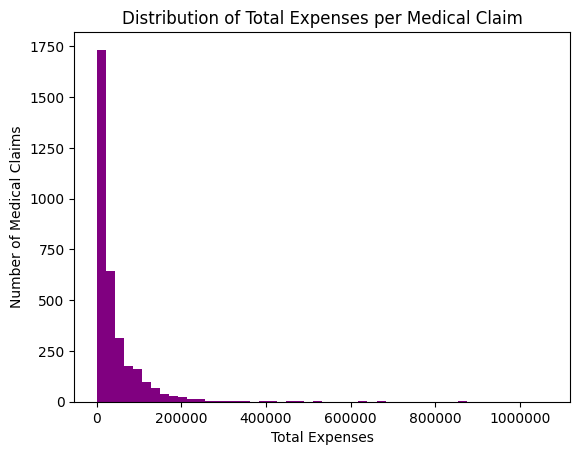

In [23]:
# prompt: distribution of the previous series

TotalExpensesByMedicalClaim.plot(kind='hist', bins=50,color='purple')
plt.xlabel('Total Expenses')
plt.ylabel('Number of Medical Claims')
plt.title('Distribution of Total Expenses per Medical Claim')
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()


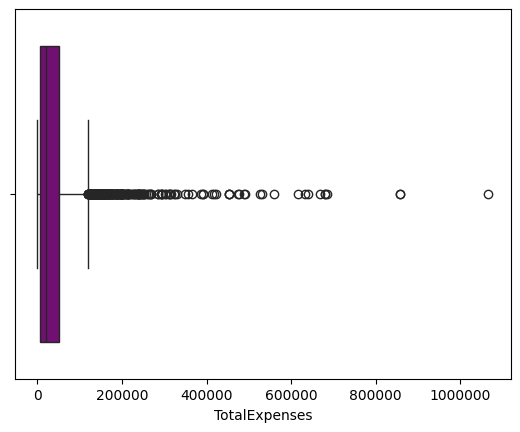

In [22]:
sns.boxplot(x=TotalExpensesByMedicalClaim,log_scale=False,color='purple')
plt.ticklabel_format(style='plain', axis='x')

### From the previous figures we observe that the total costs associated with each medical event tend to be around 42700$ (mean of the distribution), costs however exhibit large variances.

### this distribution is clearly not Normal. It seems to be following an exponential distribution.

### 3. Distribution of Costs per Medical Event in Emergency Room Services
#### This time we want to exlore the costs associated to Emergency Room Visits

In [18]:
ERServiceFilter=HealthCareDataSet['TypeFlag']=='ER'

In [19]:
TotalExpensesByMedicalClaimERVisits=HealthCareDataSet[ERServiceFilter].groupby('MedicalClaim')['TotalExpenses'].sum()
TotalExpensesByMedicalClaimERVisits

MedicalClaim
0012a8eb3c2be5f5     4668.692
003886fc8ec986d4    17115.714
004fa1cd47f65193     3672.361
005edafb00d0f6eb     2548.700
00667b58e8ae902b     1711.052
                      ...    
ff33c19456fa47f3    11204.445
ff3cd2bab44d245c    15284.843
ff3f972f14bf123c    25039.812
ff5002f30a109475    11272.863
ffbb520f6fd3b2c9    16743.412
Name: TotalExpenses, Length: 1871, dtype: float64

In [20]:
TotalExpensesByMedicalClaimERVisits.describe()

count      1871.000000
mean      11840.550294
std       12816.174369
min         156.100000
25%        3382.617000
50%        7550.970000
75%       16894.899000
max      153586.076000
Name: TotalExpenses, dtype: float64

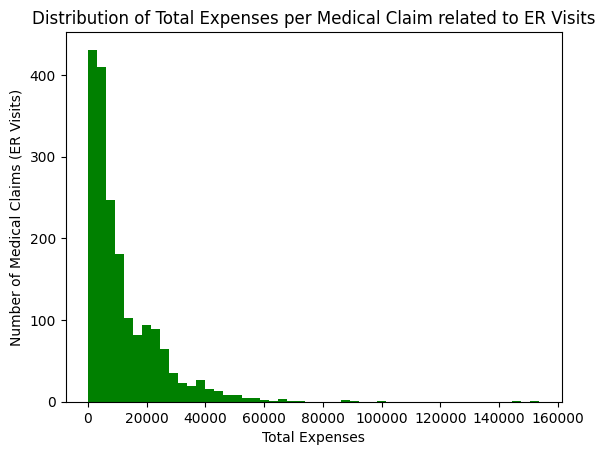

In [24]:
TotalExpensesByMedicalClaimERVisits.plot(kind='hist', bins=50,color='green')
plt.xlabel('Total Expenses')
plt.ylabel('Number of Medical Claims (ER Visits)')
plt.title('Distribution of Total Expenses per Medical Claim related to ER Visits')
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()


## From the previous figures we observe that the total costs associated with each medical in ER Services event tend to be around 11000$ (mean of the distribution), costs however exhibit large variances.

### this distribution is clearly not Normal. It seems to be following an exponential distribution.

### 4. Distribution of Interventions per Medical Event.

In [25]:
InterventionsByMedicalClaim=HealthCareDataSet.groupby('MedicalClaim')['ClaimItem'].count()
InterventionsByMedicalClaim

MedicalClaim
0012a8eb3c2be5f5     4
002fd7d73d8060f1    24
003886fc8ec986d4    18
004fa1cd47f65193     9
005edafb00d0f6eb     3
                    ..
ffbb520f6fd3b2c9    16
ffbd17c54f798c21    31
ffe2c14dfe865b6d    25
ffe9f5181940e236    12
fff610c68bdf675f    21
Name: ClaimItem, Length: 3361, dtype: int64

In [32]:
InterventionsByMedicalClaim.describe()

count    3361.000000
mean       15.639096
std        10.765814
min         1.000000
25%         8.000000
50%        15.000000
75%        21.000000
max       127.000000
Name: ClaimItem, dtype: float64

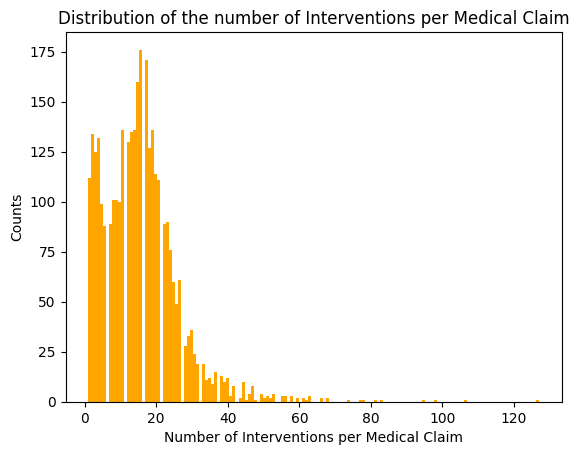

In [31]:
InterventionsByMedicalClaim.plot(kind='hist', bins=150,color='orange')
plt.xlabel('Number of Interventions per Medical Claim')
plt.ylabel('Counts')
plt.title('Distribution of the number of Interventions per Medical Claim')
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

## On average the number of interventions per Medical Claim is around 15.36.

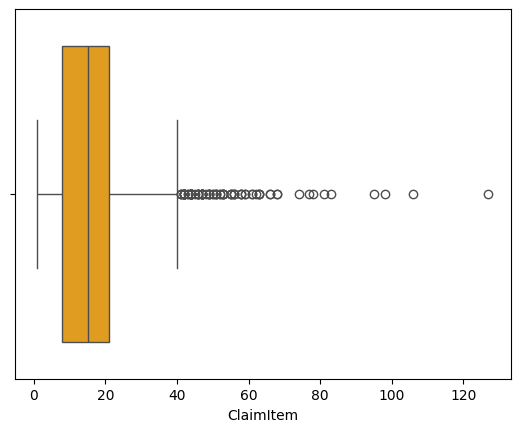

In [28]:
sns.boxplot(x=InterventionsByMedicalClaim,log_scale=False,color='orange')
plt.ticklabel_format(style='plain', axis='x')